In [1]:
import pandas as pd
data = pd.read_csv("bank.csv", delimiter=",")

In [2]:
data.head(20)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes
6,56,management,married,tertiary,no,830,yes,yes,unknown,6,may,1201,1,-1,0,unknown,yes
7,60,retired,divorced,secondary,no,545,yes,no,unknown,6,may,1030,1,-1,0,unknown,yes
8,37,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,yes
9,28,services,single,secondary,no,5090,yes,no,unknown,6,may,1297,3,-1,0,unknown,yes


In [3]:
data.shape

(11162, 17)

In [4]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [5]:
data['default'].value_counts()

no     10994
yes      168
Name: default, dtype: int64

<AxesSubplot:>

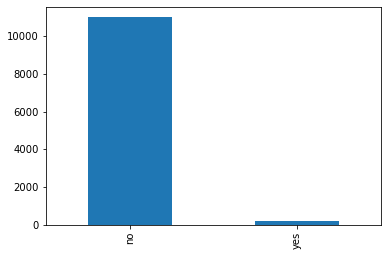

In [6]:
data['default'].value_counts().plot(kind='bar')

In [7]:
data['is_default'] = data['default'].apply(lambda row: 1 if row == 'yes' else 0)

In [8]:
data[['default','is_default']].tail()

,default,is_default
11157,no,0
11158,no,0
11159,no,0
11160,no,0
11161,no,0


In [9]:
data['is_loan'] = data['loan'].apply(lambda row: 1 if row == 'yes' else 0)
data['is_housing'] = data['housing'].apply(lambda row: 1 if row == 'yes' else 0)

<AxesSubplot:>

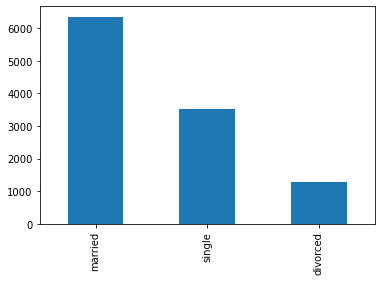

In [10]:
data['marital'].value_counts()
data['marital'].value_counts().plot(kind='bar')

In [11]:
marital_dummies = pd.get_dummies(data['marital'])
pd.concat([data['marital'], marital_dummies], axis=1).head(n=10)

,marital,divorced,married,single
0,married,0,1,0
1,married,0,1,0
2,married,0,1,0
3,married,0,1,0
4,married,0,1,0
5,single,0,0,1
6,married,0,1,0
7,divorced,1,0,0
8,married,0,1,0
9,single,0,0,1


In [12]:
marital_dummies.drop('divorced', axis=1, inplace=True)
marital_dummies.columns = [f'marital_{colname}' for colname in marital_dummies.columns]
marital_dummies.head()

,marital_married,marital_single
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [13]:
data = pd.concat([data, marital_dummies], axis=1)
data.drop('marital', axis=1, inplace=True) 

In [14]:
month_map = {'jan':1, 'feb':2, 'mar':3, 'apr':4, 'may':5, 'jun':6, 'jul':7, 'aug':8, 'sep':9, 'oct':10, 'nov':11, 'dec': 12}

In [15]:
data['month'] = data['month'].map(month_map)

In [16]:
data.dtypes

age                 int64
job                object
education          object
default            object
balance             int64
housing            object
loan               object
contact            object
day                 int64
month               int64
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
deposit            object
is_default          int64
is_loan             int64
is_housing          int64
marital_married     uint8
marital_single      uint8
dtype: object

In [17]:
education_dummies = pd.get_dummies(data['education'])
pd.concat([data['education'], education_dummies], axis=1).head(n=10)

,education,primary,secondary,tertiary,unknown
0,secondary,0,1,0,0
1,secondary,0,1,0,0
2,secondary,0,1,0,0
3,secondary,0,1,0,0
4,tertiary,0,0,1,0
5,tertiary,0,0,1,0
6,tertiary,0,0,1,0
7,secondary,0,1,0,0
8,secondary,0,1,0,0
9,secondary,0,1,0,0


In [18]:
education_dummies.drop('unknown', axis=1, inplace=True)
education_dummies.columns = [f'education_{colname}' for colname in education_dummies.columns]
education_dummies.head()

,education_primary,education_secondary,education_tertiary
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,0,1


In [19]:
data = pd.concat([data, education_dummies], axis=1)
data.drop('education', axis=1, inplace=True) 

In [20]:
job_dummies = pd.get_dummies(data['job'])
pd.concat([data['job'], job_dummies], axis=1).head(n=10)

,job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
0,admin.,1,0,0,0,0,0,0,0,0,0,0,0
1,admin.,1,0,0,0,0,0,0,0,0,0,0,0
2,technician,0,0,0,0,0,0,0,0,0,1,0,0
3,services,0,0,0,0,0,0,0,1,0,0,0,0
4,admin.,1,0,0,0,0,0,0,0,0,0,0,0
5,management,0,0,0,0,1,0,0,0,0,0,0,0
6,management,0,0,0,0,1,0,0,0,0,0,0,0
7,retired,0,0,0,0,0,1,0,0,0,0,0,0
8,technician,0,0,0,0,0,0,0,0,0,1,0,0
9,services,0,0,0,0,0,0,0,1,0,0,0,0


In [21]:
job_dummies.drop('unknown', axis=1, inplace=True)
job_dummies.columns = [f'job_{colname}' for colname in job_dummies.columns]
job_dummies.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed
0,1,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0


In [22]:
data = pd.concat([data, job_dummies], axis=1)
data.drop('job', axis=1, inplace=True) 

In [23]:
contact_dummies = pd.get_dummies(data['contact'])
pd.concat([data['contact'], contact_dummies], axis=1).head(n=10)

,contact,cellular,telephone,unknown
0,unknown,0,0,1
1,unknown,0,0,1
2,unknown,0,0,1
3,unknown,0,0,1
4,unknown,0,0,1
5,unknown,0,0,1
6,unknown,0,0,1
7,unknown,0,0,1
8,unknown,0,0,1
9,unknown,0,0,1


In [24]:
contact_dummies.drop('unknown', axis=1, inplace=True)
contact_dummies.columns = [f'contact_{colname}' for colname in contact_dummies.columns]
contact_dummies.head()

,contact_cellular,contact_telephone
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [25]:
data = pd.concat([data, contact_dummies], axis=1)
data.drop('contact', axis=1, inplace=True) 

In [26]:
poutcome_dummies = pd.get_dummies(data['poutcome'])
pd.concat([data['poutcome'], poutcome_dummies], axis=1).head(n=10)

,poutcome,failure,other,success,unknown
0,unknown,0,0,0,1
1,unknown,0,0,0,1
2,unknown,0,0,0,1
3,unknown,0,0,0,1
4,unknown,0,0,0,1
5,unknown,0,0,0,1
6,unknown,0,0,0,1
7,unknown,0,0,0,1
8,unknown,0,0,0,1
9,unknown,0,0,0,1


In [27]:
poutcome_dummies.drop('unknown', axis=1, inplace=True)
poutcome_dummies.columns = [f'poutcome_{colname}' for colname in poutcome_dummies.columns]
poutcome_dummies.head()

,poutcome_failure,poutcome_other,poutcome_success
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [28]:
data = pd.concat([data, poutcome_dummies], axis=1)
data.drop('poutcome', axis=1, inplace=True) 

In [29]:
data.dtypes

age                     int64
default                object
balance                 int64
housing                object
loan                   object
day                     int64
month                   int64
duration                int64
campaign                int64
pdays                   int64
previous                int64
deposit                object
is_default              int64
is_loan                 int64
is_housing              int64
marital_married         uint8
marital_single          uint8
education_primary       uint8
education_secondary     uint8
education_tertiary      uint8
job_admin.              uint8
job_blue-collar         uint8
job_entrepreneur        uint8
job_housemaid           uint8
job_management          uint8
job_retired             uint8
job_self-employed       uint8
job_services            uint8
job_student             uint8
job_technician          uint8
job_unemployed          uint8
contact_cellular        uint8
contact_telephone       uint8
poutcome_f

In [30]:
# deposit_dummies = pd.get_dummies(data['deposit'])
# data = pd.concat([data, deposit_dummies], axis=1).head(n=10)
data["deposit"] = data["deposit"].map({"yes":1,"no":0})

In [31]:
# deposit_dummies.columns = [f'contact_{colname}' for colname in contact_dummies.columns]
# contact_dummies.head()

NameError: name 'deposit_dummies' is not defined

In [32]:
#data = pd.concat([data, deposit_dummies], axis=1)
#data.drop('deposit', axis=1, inplace=True) 
data.drop('default', axis=1, inplace=True) 
data.drop('housing', axis=1, inplace=True) 
data.drop('loan', axis=1, inplace=True) 

In [33]:
data.dtypes

age                    int64
balance                int64
day                    int64
month                  int64
duration               int64
campaign               int64
pdays                  int64
previous               int64
deposit                int64
is_default             int64
is_loan                int64
is_housing             int64
marital_married        uint8
marital_single         uint8
education_primary      uint8
education_secondary    uint8
education_tertiary     uint8
job_admin.             uint8
job_blue-collar        uint8
job_entrepreneur       uint8
job_housemaid          uint8
job_management         uint8
job_retired            uint8
job_self-employed      uint8
job_services           uint8
job_student            uint8
job_technician         uint8
job_unemployed         uint8
contact_cellular       uint8
contact_telephone      uint8
poutcome_failure       uint8
poutcome_other         uint8
poutcome_success       uint8
dtype: object

In [34]:
data['was_contacted'] = data['pdays'].apply(lambda row: 0 if row == -1 else 1)

In [35]:
data.drop('pdays', axis=1, inplace=True)

In [36]:
data[['was_contacted']].head(n=10)

,was_contacted
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [37]:
data.head()

,age,balance,day,month,duration,campaign,previous,deposit,is_default,is_loan,...,job_services,job_student,job_technician,job_unemployed,contact_cellular,contact_telephone,poutcome_failure,poutcome_other,poutcome_success,was_contacted
0,59,2343,5,5,1042,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,56,45,5,5,1467,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,41,1270,5,5,1389,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,55,2476,5,5,579,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
4,54,184,5,5,673,2,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
x = list(data.columns)
y = x.pop(7)


In [46]:
y

'deposit'

In [48]:
X = data[x]
Y = data[y]

In [57]:
len(x)

32

In [49]:
from sklearn.model_selection import train_test_split
test_size = 0.2
random_state = 42
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=random_state)

In [50]:
print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of X_test: {X_test.shape}')
print(f'Shape of y_test: {y_test.shape}')

Shape of X_train: (8929, 32)
Shape of y_train: (8929,)
Shape of X_test: (2233, 32)
Shape of y_test: (2233,)


In [51]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=42)

In [53]:
model.fit(X_train, y_train)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [55]:
y_pred = model.predict(X_test)

In [56]:
from sklearn import metrics
accuracy = metrics.accuracy_score(y_pred=y_pred, y_true=y_test)
print(f'Accuracy of the model is {accuracy*100:.4f}%')

Accuracy of the model is 78.3251%


In [144]:
from __future__ import print_function

import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf

model=Sequential()
model.add(Dense(128,input_dim=32,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(64,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 128)               4224      
_________________________________________________________________
dropout_10 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_32 (Dense)             (None, 1)                 65        
Total params: 12,545
Trainable params: 12,545
Non-trainable params: 0
_________________________________________________________________


In [124]:
from sklearn.model_selection import GridSearchCV

def algorithm_pipeline(X_train_data, X_test_data, y_train_data, y_test_data, 
                       model, param_grid, cv=10, scoring_fit='neg_mean_squared_error',
                       do_probabilities = False):
    gs = GridSearchCV(
        estimator=model,
        param_grid=param_grid, 
        cv=cv, 
        n_jobs=-1, 
        scoring=scoring_fit,
        verbose=2
    )
    fitted_model = gs.fit(X_train_data, y_train_data)
    
    if do_probabilities:
        pred = fitted_model.predict_proba(X_test_data)
    else:
        pred = fitted_model.predict(X_test_data)
    
    return fitted_model, pred

In [130]:
len(y_test)

2233

In [141]:

from keras.wrappers.scikit_learn import KerasClassifier

param_grid = {
              'epochs':[20,60],
              'batch_size':[56,356]
              #'epochs' :              [100,150,200],
              #'batch_size' :          [32, 128],
              #'optimizer' :           ['Adam', 'Nadam'],
              #'dropout_rate' :        [0.2, 0.3],
              #'activation' :          ['relu', 'elu']
             }

model = KerasClassifier(build_fn = model, verbose=1)

model, pred = algorithm_pipeline(X_train, y_train, X_test, y_test, model, 
                                        param_grid, cv=5, scoring_fit='accuracy')

print(model.best_score_)
print(model.best_params_)

ValueError: Found input variables with inconsistent numbers of samples: [8929, 2233]

In [155]:
batch_size = 110
epochs = 50
mc= ModelCheckpoint('best_model.h5',monitor='val_loss',save_best_only=True,mode='min') 
es = EarlyStopping(monitor='val_loss',mode='min',patience=18)

model.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    callbacks = [mc,es],
                    validation_split=0.2)

Epoch 1/50
65/65 [==============================] - 1s 5ms/step - loss: 0.4300 - accuracy: 0.8009 - val_loss: 0.4134 - val_accuracy: 0.8231
Epoch 2/50
65/65 [==============================] - 0s 3ms/step - loss: 0.4208 - accuracy: 0.8050 - val_loss: 0.4237 - val_accuracy: 0.8264
Epoch 3/50
65/65 [==============================] - 0s 3ms/step - loss: 0.4214 - accuracy: 0.8081 - val_loss: 0.4111 - val_accuracy: 0.8264
Epoch 4/50
65/65 [==============================] - 0s 3ms/step - loss: 0.4290 - accuracy: 0.8074 - val_loss: 0.4256 - val_accuracy: 0.8085
Epoch 5/50
65/65 [==============================] - 0s 3ms/step - loss: 0.4195 - accuracy: 0.8146 - val_loss: 0.4432 - val_accuracy: 0.8119
Epoch 6/50
65/65 [==============================] - 0s 3ms/step - loss: 0.4224 - accuracy: 0.8088 - val_loss: 0.4282 - val_accuracy: 0.8119
Epoch 7/50
65/65 [==============================] - 0s 3ms/step - loss: 0.4228 - accuracy: 0.8095 - val_loss: 0.4120 - val_accuracy: 0.8287
Epoch 8/50
65/65 [==

In [156]:
cnn_model=keras.models.load_model('best_model.h5')
score=cnn_model.evaluate(X_test, y_test)
print("test accuracy:",score[1])

70/70 [==============================] - 0s 1ms/step - loss: 0.4517 - accuracy: 0.8039
test accuracy: 0.803851306438446
